# Explore here

Top 3 canciones más populares:
                                          name  popularity  duration_min
0    Symphony Of Destruction - Remastered 2012          70          4.03
1  Holy Wars...The Punishment Due - 2004 Remix          69          6.54
2            A Tout Le Monde - Remastered 2004          67          4.37
📊 Gráfico guardado como scatter_plot.png


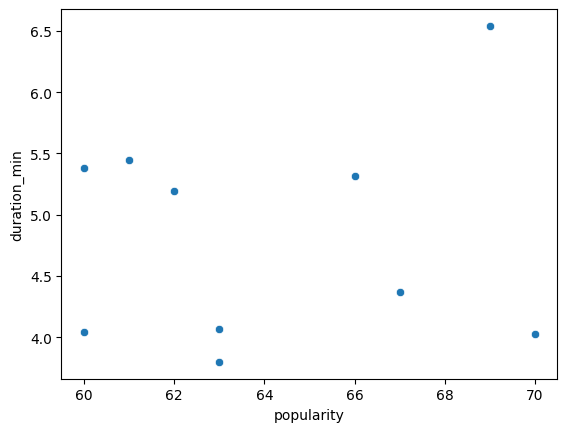

In [ ]:
from dotenv import load_dotenv
import os
import pandas as pd
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


load_dotenv(dotenv_path="../.env")


client_id = os.getenv("SPOTIFY_CLIENT_ID")
client_secret = os.getenv("SPOTIFY_CLIENT_SECRET")


sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))


artist_id = "1Yox196W7bzVNZI7RBaPnf"

# Obtener las mejores canciones del artista
response = sp.artist_top_tracks(artist_id)

if response:
    tracks = response["tracks"]
    
    # Seleccionar solo la información relevante y convertir la duración a minutos
    tracks = [{
        "name": track["name"],
        "popularity": track["popularity"],
        "duration_min": round(track["duration_ms"] / 60000, 2)  # Convertir ms a minutos
    } for track in tracks]

    # Convertir a un DataFrame para mejor visualización
    tracks_df = pd.DataFrame.from_records(tracks)

    # Ordenar por popularidad de menor a mayor
    tracks_df = tracks_df.sort_values(by="popularity", ascending=False)

# Mostrar el top 3 más popular
    print("Top 3 canciones más populares:")
    print(tracks_df.head(3))

    # Crear gráfico de dispersión Popularidad vs Duración
    scatter_plot = sns.scatterplot(data=tracks_df, x="popularity", y="duration_min")
    fig = scatter_plot.get_figure()
    fig.savefig("scatter_plot.png")
    print("📊 Gráfico guardado como scatter_plot.png")





